# Function approximation with a deep neural network

> Author : Badr TAJINI - Machine Learning 2 & Deep learning - ECE 2025-2026

---

## Quartic function and training dataset

In algebra, a quartic function is a function of the form
$$
f(t)=at^{4}+bt^{3}+ct^{2}+dt+e,
$$
where $a$ is nonzero, which is defined by a polynomial of degree four, called a quartic polynomial.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch


Define and plot a quartic function

In [2]:
D_in = 1
D_out = 1

# Create random Tensors to hold inputs and outputs
x = torch.arange(-9,3.5,0.1).view(-1,1) #(-5,3.5,0.1)
y = x**4 + 2*x**3 - 12*x**2 -2*x + 6
y = torch.where(x < -5, torch.zeros_like(x), y)
N = x.shape[0]

In [3]:
print(x.size())
print(y.size())


torch.Size([125, 1])
torch.Size([125, 1])


Converting Torch Tensor to NumPy Array for plotting the function

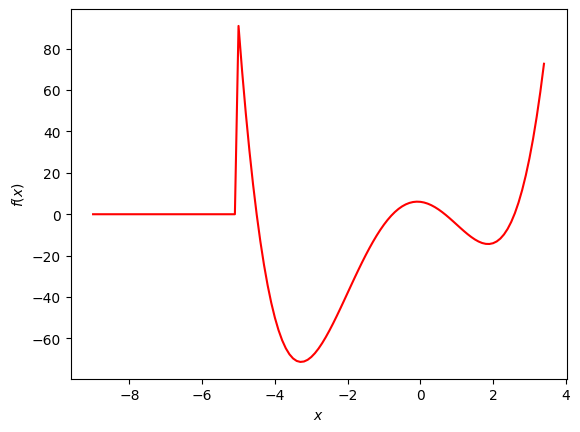

In [4]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

## Approximation with a deep neural network

### Question: code a deep neural network to approximate the function. The network will have 3 full-connected layers (followed by a ReLU activation function) and a final full-connected layer without any activation function. You will use the Adam optimizer. Choose the most appropriate loss function. You must compute the loss at each epoch.

In [5]:
# Complete this cell: model and training
import torch
import numpy as np

# create 3 hidden layers
H1 = 30
H2 = 20
H3 = 10

#**** Number of iterations (Niter) # set the checkpoint (np)
Niter = 5*10**3
saveLoss = np.zeros(Niter)

# create a simple NN with 3 hidden layers and torch.NN
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),
    torch.nn.ReLU(),
    torch.nn.Linear(H3, D_out)
)

# call torch.nn.MSE()
loss_fn = torch.nn.MSELoss(reduction='mean')

# call LR = set by yourself
learning_rate = 1e-2

# call optim torch.optim.adam
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# call the loop (Niter)
for t in range(Niter):

  # set the forward pass
  y_pred = model(x)

  # compute the loss
  loss = loss_fn(y_pred, y)
  # checkpoint
  saveLoss[t] = loss.detach().numpy()
  if t % 1000 == 999:
    print(t, loss.item())
  # call optimizer
  optimizer.zero_grad()
  # call backward
  loss.backward()
  # call optmizer step
  optimizer.step()


999 9.007575988769531
1999 1.077763319015503
2999 0.11930098384618759
3999 0.11328797042369843
4999 0.116124726831913


Plot the training error as a function of the epoch

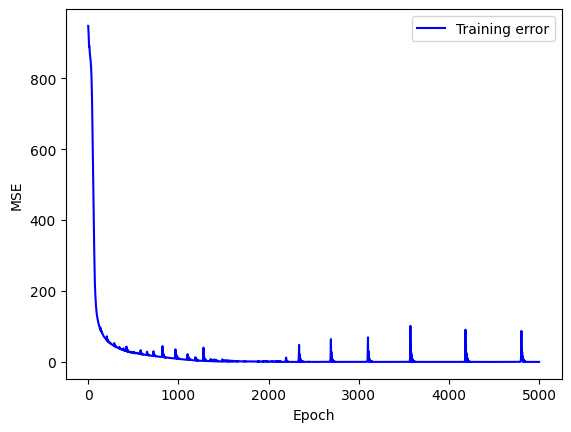

In [6]:
fig, ax = plt.subplots()
plt.plot(range(Niter),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
ax.legend()
plt.show()

### Question: plot on the same graph the quartic function and its approximation

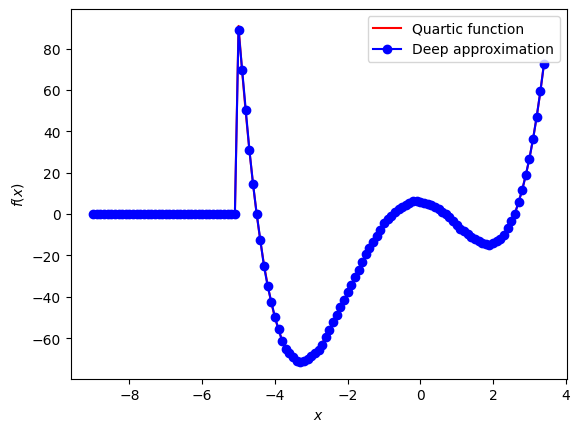

In [7]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

How many parameters?

In [8]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [9]:
print(model.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=1, bias=True)
)>

Total number of parameters 901



Print all the parameters (just for seeing them)

In [10]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[ 0.3578],
        [ 1.0919],
        [-0.5842],
        [-0.5725],
        [ 0.4609],
        [-1.3116],
        [ 0.2566],
        [ 0.9735],
        [ 0.7448],
        [ 0.6436],
        [ 0.1279],
        [ 0.1016],
        [ 0.5408],
        [-0.0605],
        [ 1.0395],
        [ 0.2649],
        [ 0.4101],
        [ 0.3145],
        [ 0.3775],
        [-0.3765],
        [ 0.2107],
        [ 0.1119],
        [ 0.3502],
        [ 0.2772],
        [-0.5498],
        [ 0.7191],
        [-0.4739],
        [ 0.3538],
        [-1.2535],
        [ 0.8786]], requires_grad=True)
Parameter containing:
tensor([ 2.1398,  0.1517, -2.1961, -0.1330, -1.4965, -2.0898,  1.1957, -1.8200,
        -1.9475, -1.8246,  2.0733,  2.2005,  1.8173,  0.7994, -0.2932,  0.8347,
         1.9196,  1.9557,  2.3087,  1.5944,  0.9513, -0.3886,  1.6342,  2.0092,
         2.5709, -0.8019, -1.6789,  1.4210, -1.2723, -1.9924],
       requires_grad=True)
Parameter containing:
tensor([[ 3.3

## Approximation with a shallow neural network

### Question: code a one-hidden layer neural network with approximatively the same number of parameters than the multilayer neural network. What is the "best" architecture?

In [11]:
# Complete this cell: model and training
import torch
import numpy as np

# create 3 hidden layers
H1 = 300

#**** Number of iterations (Niter) # set the checkpoint (np)
Niter = 30*10**3
saveLoss = np.zeros(Niter)

# create a simple NN with 1 hidden layers and torch.NN
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, D_out)
)

# call torch.nn.MSE()
loss_fn = torch.nn.MSELoss(reduction='mean')

# call LR = set by yourself
learning_rate = 1e-2

# call optim torch.optim.adam
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# call the loop (Niter)
for t in range(Niter):

  # set the forward pass
  y_pred = model(x)

  # compute the loss
  loss = loss_fn(y_pred, y)
  # checkpoint
  saveLoss[t] = loss.detach().numpy()
  if t % 1000 == 999:
    print(t, loss.item())
  # call optimizer
  optimizer.zero_grad()
  # call backward
  loss.backward()
  # call optmizer step
  optimizer.step()




999 96.35639953613281
1999 95.79830169677734
2999 95.69380950927734
3999 95.66631317138672
4999 95.63723754882812
5999 95.62324523925781
6999 95.61782836914062
7999 95.61616516113281
8999 90.70218658447266
9999 50.29144287109375
10999 40.688026428222656
11999 35.244720458984375
12999 31.907346725463867
13999 29.370668411254883
14999 27.58562660217285
15999 26.29889678955078
16999 25.218664169311523
17999 24.16793441772461
18999 23.444114685058594
19999 22.67690086364746
20999 22.038137435913086
21999 21.473276138305664
22999 21.029714584350586
23999 20.440412521362305
24999 19.94487953186035
25999 19.62249183654785
26999 19.085752487182617
27999 18.683765411376953
28999 18.32193374633789
29999 17.955612182617188


Pour obtenir un nombre de paramètres équivalent au réseau profond (901), j'ai dimensionné la couche cachée à 300 neurones.

L'architecture profonde ("Deep") reste la meilleure option. À nombre de paramètres égal, l'empilement de couches non linéaires permet de modéliser plus efficacement les variations complexes de la fonction quartique.

Le réseau peu profond ("Shallow") nécessiterait une largeur bien plus importante pour atteindre la même précision, ce qui le rend moins efficient en termes de capacité de représentation.

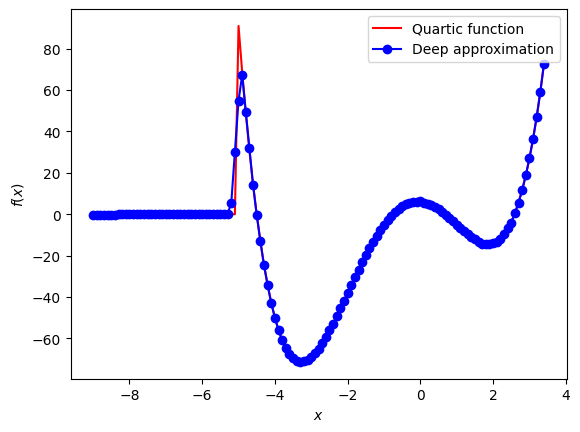

In [12]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

In [13]:
print("\nTotal number of parameters {}\n".format(count_parameters(model)))


Total number of parameters 901

